# Classification of NBA players role

Dataset description

The dataset of NBA basketball players data are gathered from (https://www.kaggle.com/jacobbaruch/nba-player-of-the-week).

Logistic regression is used, as implemented in Scikit-learn, to predict labels.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

In [2]:
filename = 'data/NBA.csv'
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA)
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:]
Y = dataset[:,0]

Y = Y*2-1  

m = dataset.shape[0]
permutation = np.random.permutation(m)

X = X[permutation]
Y = Y[permutation]

['Position', 'Height cm', 'kg', 'Age']


In [3]:
training_m, test_m = 195, 65
m_training = training_m 

m_test = test_m # the number of samples in the test set

X_training = X[:195] 
Y_training = Y[:195] 

X_test = X[195:]  
Y_test = Y[195:]

print(X_training)
print(Y_training)
print(m_test)

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

#add a 1 to each sample
arr_x1 = np.ones((195, 1))
X_training = np.hstack((X_training, arr_x1))
arr_x2 = np.ones((65, 1))
X_test = np.hstack((X_test, arr_x2))
print(X_training)
print(Y_training)
print(X_test)

[[185 108  34]
 [185  96  26]
 [155  73  24]
 [210 114  25]
 [185 108  23]
 [216 146  25]
 [186 119  27]
 [186 119  24]
 [225 112  35]
 [210 114  29]
 [213 114  24]
 [213 109  25]
 [198  85  29]
 [182  74  23]
 [182  78  25]
 [192  90  26]
 [231 139  25]
 [195  94  28]
 [186 119  26]
 [204  87  28]
 [210 114  26]
 [192  90  33]
 [210 114  27]
 [188  87  24]
 [186 119  22]
 [216 146  24]
 [182  78  28]
 [185  81  27]
 [188  83  29]
 [210 117  20]
 [216 146  25]
 [186 119  23]
 [185  96  30]
 [213 128  28]
 [213 114  28]
 [185  81  35]
 [219 117  25]
 [210 114  27]
 [219 101  26]
 [188  83  32]
 [186 125  22]
 [182  78  28]
 [186 116  24]
 [155  87  22]
 [192  90  28]
 [182  76  29]
 [186 119  23]
 [213 117  24]
 [216 146  23]
 [185  81  26]
 [231 139  25]
 [195  94  30]
 [195  94  32]
 [186 108  22]
 [182  78  25]
 [155  81  25]
 [216 146  25]
 [231 139  26]
 [192  90  27]
 [182  78  27]
 [195  94  25]
 [195  94  27]
 [216 112  31]
 [213 119  27]
 [192  76  27]
 [185 108  24]
 [186 103 

In [4]:
logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(X_training, Y_training)

predicted_training = logreg.predict(X_training)

# the error rate
error_rate_training = 0.
for i in range(len(Y_training)):
    if predicted_training[i]!=Y_training[i]:
        error_rate_training += 1.
error_rate_training = error_rate_training / m_training
print("Error rate on training set: "+str(error_rate_training))

# predict on test set
predicted_test = logreg.predict(X_test)

# the error rate
error_rate_test = 0.
for i in range(len(Y_test)):
    if predicted_test[i]!=Y_test[i]:
        error_rate_test += 1.
error_rate_test = error_rate_test / m_test
print("Error rate on test set: "+str(error_rate_test))

Error rate on training set: 0.08717948717948718
Error rate on test set: 0.015384615384615385


In [6]:
features_list = ['height', 'weight', 'age']
labels_list = ['Center', 'Point guard']

index_feature1 = 0 
index_feature2 = 1 
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

X_training = X_reduced[:m_training,] 
Y_training = Y[:m_training] 

X_test = X_reduced[m_training:,] 
Y_test = Y[m_training:] 

<ipython-input-8-f33f51830131>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


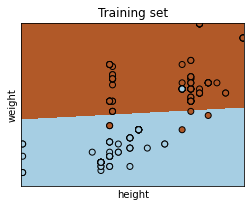

<ipython-input-8-f33f51830131>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


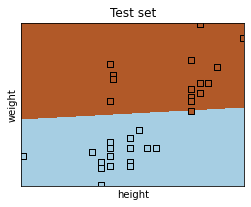

In [8]:
logreg.fit(X_training, Y_training)

h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot of training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()


Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot of the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()